In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_color_codes('muted')
tips=sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
sizes = list(tips['size']).__iter__()

In [1]:
def find_counts(stream):
    counts={}
    for s in stream:
        counts[s]= counts.get(s,0)+1
    return counts

In [11]:
count = find_counts(list(tips['size']).__iter__())
print count

{1: 4, 2: 156, 3: 38, 4: 37, 5: 5, 6: 4}


In [6]:
data = {'size':count.keys(),'count':count.values()}
df= pd.DataFrame.from_dict(data)
df

,count,size
0,4,1
1,156,2
2,38,3
3,37,4
4,5,5
5,4,6


In [22]:
def find_median(stream):
    counts={}
    total=0
    for s in stream:
        counts[s]=counts.get(s,0)+1
        total += 1
    ### get the median count
    keys=sorted(counts.keys())
    total= sum(counts.values())
    acc=0
    for k in keys:
        v=counts[k]
        acc+=v
        if acc*2>total:
            return k
    return 'we get empty stream'


sizes=list(tips['size']).__iter__()
median = find_median(sizes)
print median

2


In [18]:
bill_size = tips[['total_bill','size']]

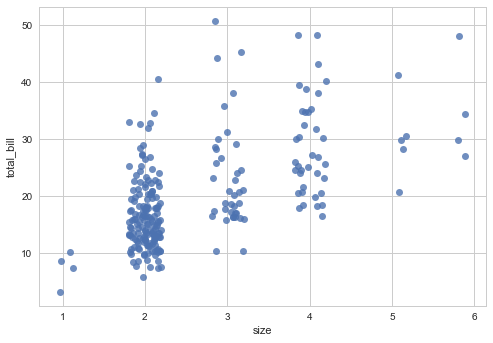

In [20]:
sns.regplot(x='size',y='total_bill',data=bill_size,fit_reg=False,x_jitter=0.2)

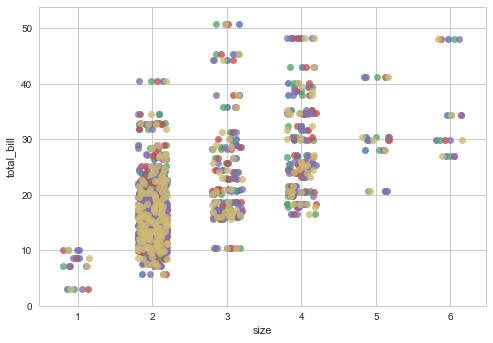

In [24]:
def create_stream (bs,chunk_size=50):
    for i in xrange(0,len(bs),chunk_size):
        yield bs[i:i+chunk_size] 

for chunk in create_stream(bill_size,50):
    sns.regplot(x='size',y='total_bill',data=bill_size,fit_reg=False,x_jitter=0.2)

In [25]:
import csv

{0: 401, 1: 248, 2: 117, 3: 89, 4: 89, 5: 293, 6: 988, 7: 2037, 8: 3668, 9: 3108, 10: 2241, 11: 2090, 12: 2289, 13: 2443, 14: 2685, 15: 2856, 16: 3471, 17: 4788, 18: 4270, 19: 2839, 20: 1844, 21: 1343, 22: 1192, 23: 811}


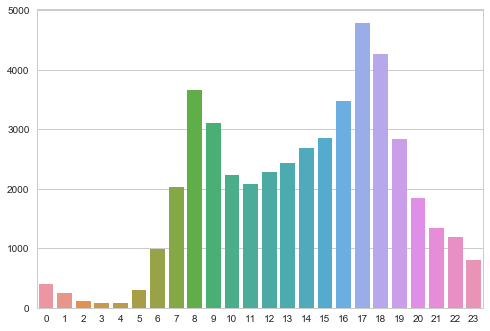

In [38]:
counts={}
with open('citibike.csv','r') as fi:
    reader= csv.DictReader(fi)
    for row in reader:
        hour = int(row['starttime'].split(' ')[1].split(':')[0])
        counts[hour] =counts.get(hour,0) + 1

#counts={0:100,7:500,17:600,23:10}
print counts
sns.barplot(x=counts.keys(), y=counts.values())